In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import numpy as np
import torch
import scanpy as sc
import muon as mu
import anndata
import mudata
import pandas as pd

print(anndata.__version__)
print(mudata.__version__)
print(sc.__version__)
print(torch.__version__)

0.8.0
0.2.1
1.9.2
1.11.0


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from src.types import TrainParams
from src.smvae.model import SMVAE, ModalityLayers
from src.model import ModelParams, SamplingLayers
from src.smvae.train import train_smvae
from src.smvae.dataloader import *
from src.types import TrainParams
from src.smvae.diagnostics import plot_embedding, classification_performance

In [5]:
mdata = mu.read('/media/yob/nacho_stuff/prostate_cancer/Integration/MVAE-PoE/OtF-prostate/data/mdata_preprocessed_final_filtered.h5mu')

In [6]:
metadata = mu.read('/media/yob/nacho_stuff/prostate_cancer/Integration/MVAE-PoE/OtF-prostate/data/mdata_metadata.h5mu')
mdata.obs["new_ann"] = metadata.obs["new_ann"]
mdata.mod["msi"].obs["new_ann"] = metadata.obs["new_ann"]
mdata.mod["rna"].obs["new_ann"] = metadata.obs["new_ann"]

## No LISI

In [9]:
## beta=0.1
train_params = TrainParams(add_lisi_loss=False, train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="smvae_prostate_nolisi_beta0.1")
model_params = ModelParams(beta=0.1, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)
model = SMVAE(mdata, model_params)

(42475, 18950)
(42475, 12510)


In [10]:
train_smvae(model, mdata, "sample", train_params)

# model.load_state_dict(torch.load("vae_params/smvae_prostate_nolisi_fullshared_20230429-174252.pt"))

Train data size: 33980
Test data size: 8495


100%|█████████████████████████████████████████| 266/266 [01:03<00:00,  4.16it/s]

EarlyStopping (epoch: 1): train loss improved to 0.055288388155150796



100%|███████████████████████████████████████████| 67/67 [00:17<00:00,  3.79it/s]

EarlyStopping (epoch: 1): valid loss improved to 3.400069781203768



100%|█████████████████████████████████████████| 266/266 [01:05<00:00,  4.06it/s]

EarlyStopping (epoch: 2): train loss improved to 0.022991985864959232



100%|███████████████████████████████████████████| 67/67 [00:15<00:00,  4.30it/s]

EarlyStopping (epoch: 2): valid loss improved to 2.6216924297275828



100%|███████████████████████████████████████████| 67/67 [00:17<00:00,  3.94it/s]

EarlyStopping (epoch: 3): valid loss improved to 2.4554271947092086



100%|███████████████████████████████████████████| 67/67 [00:15<00:00,  4.27it/s]

EarlyStopping (epoch: 4): valid loss improved to 2.301202852334549



100%|███████████████████████████████████████████| 67/67 [00:15<00:00,  4.21it/s]

EarlyStopping (epoch: 5): valid loss improved to 2.1828991263660034



100%|███████████████████████████████████████████| 67/67 [00:15<00:00,  4.33it/s]

EarlyStopping (epoch: 6): valid loss improved to 2.0995307466877042



100%|███████████████████████████████████████████| 67/67 [00:15<00:00,  4.34it/s]

EarlyStopping (epoch: 7): valid loss improved to 2.0593707187851864



100%|███████████████████████████████████████████| 67/67 [00:15<00:00,  4.38it/s]

EarlyStopping (epoch: 8): valid loss improved to 2.031223663643225



100%|███████████████████████████████████████████| 67/67 [00:15<00:00,  4.24it/s]

EarlyStopping (epoch: 9): valid loss improved to 2.0102339075572453



100%|███████████████████████████████████████████| 67/67 [00:15<00:00,  4.41it/s]

EarlyStopping (epoch: 10): valid loss improved to 1.986289453150621



100%|███████████████████████████████████████████| 67/67 [00:16<00:00,  3.98it/s]

EarlyStopping (epoch: 11): valid loss improved to 1.9644063889090695



100%|█████████████████████████████████████████| 266/266 [01:02<00:00,  4.25it/s]

EarlyStopping (epoch: 12): train loss hasn't improved: 0.01592618564495695. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:15<00:00,  4.35it/s]

EarlyStopping (epoch: 12): valid loss improved to 1.9453215670229784



100%|█████████████████████████████████████████| 266/266 [01:03<00:00,  4.16it/s]

EarlyStopping (epoch: 13): train loss hasn't improved: 0.015806691870400316. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:15<00:00,  4.31it/s]

EarlyStopping (epoch: 13): valid loss improved to 1.9336224367369468



100%|█████████████████████████████████████████| 266/266 [01:02<00:00,  4.29it/s]

EarlyStopping (epoch: 14): train loss hasn't improved: 0.01570103529132486. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:15<00:00,  4.36it/s]

EarlyStopping (epoch: 14): valid loss improved to 1.9194036651013502



100%|█████████████████████████████████████████| 266/266 [01:05<00:00,  4.04it/s]

EarlyStopping (epoch: 15): train loss hasn't improved: 0.01562223509173312. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:02<00:00,  4.23it/s]

EarlyStopping (epoch: 16): train loss hasn't improved: 0.015538719438538262. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:16<00:00,  4.07it/s]

EarlyStopping (epoch: 16): valid loss improved to 1.9002193230301587



100%|█████████████████████████████████████████| 266/266 [01:00<00:00,  4.41it/s]

EarlyStopping (epoch: 17): train loss hasn't improved: 0.015492566513131127. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:00<00:00,  4.40it/s]

EarlyStopping (epoch: 18): train loss hasn't improved: 0.015434656390868754. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:16<00:00,  4.07it/s]

EarlyStopping (epoch: 18): valid loss improved to 1.8855845180910025



100%|█████████████████████████████████████████| 266/266 [01:01<00:00,  4.34it/s]

EarlyStopping (epoch: 19): train loss hasn't improved: 0.015373844553822276. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:03<00:00,  4.21it/s]

EarlyStopping (epoch: 20): train loss hasn't improved: 0.015358067839337911. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:02<00:00,  4.25it/s]

EarlyStopping (epoch: 21): train loss hasn't improved: 0.015317035068688216. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:15<00:00,  4.35it/s]

EarlyStopping (epoch: 21): valid loss improved to 1.8720437412831321



100%|█████████████████████████████████████████| 266/266 [00:59<00:00,  4.48it/s]

EarlyStopping (epoch: 22): train loss hasn't improved: 0.01529073779059551. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:04<00:00,  4.14it/s]

EarlyStopping (epoch: 23): train loss hasn't improved: 0.015255591545194791. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:00<00:00,  4.36it/s]

EarlyStopping (epoch: 24): train loss hasn't improved: 0.015229788634831798. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:02<00:00,  4.26it/s]

EarlyStopping (epoch: 25): train loss hasn't improved: 0.015207481110636243. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:14<00:00,  4.51it/s]

EarlyStopping (epoch: 25): valid loss improved to 1.8587548519248394



100%|█████████████████████████████████████████| 266/266 [00:59<00:00,  4.48it/s]

EarlyStopping (epoch: 26): train loss hasn't improved: 0.015191845307285607. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:01<00:00,  4.32it/s]

EarlyStopping (epoch: 27): train loss hasn't improved: 0.015166679135205256. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:00<00:00,  4.37it/s]

EarlyStopping (epoch: 28): train loss hasn't improved: 0.015149973633711726. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:01<00:00,  4.33it/s]

EarlyStopping (epoch: 29): train loss hasn't improved: 0.015126269122584558. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:01<00:00,  4.34it/s]

EarlyStopping (epoch: 30): train loss hasn't improved: 0.015121271755500286. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:02<00:00,  4.28it/s]

EarlyStopping (epoch: 31): train loss hasn't improved: 0.015097074809672203. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:02<00:00,  4.28it/s]

EarlyStopping (epoch: 32): train loss hasn't improved: 0.0150930592001993. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:15<00:00,  4.20it/s]

EarlyStopping (epoch: 32): valid loss improved to 1.8436030896741953



100%|█████████████████████████████████████████| 266/266 [01:00<00:00,  4.37it/s]

EarlyStopping (epoch: 33): train loss hasn't improved: 0.015090535899482803. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:02<00:00,  4.24it/s]

EarlyStopping (epoch: 34): train loss hasn't improved: 0.015070158348425898. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:01<00:00,  4.32it/s]

EarlyStopping (epoch: 35): train loss hasn't improved: 0.015060235511702323. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:00<00:00,  4.40it/s]

EarlyStopping (epoch: 36): train loss hasn't improved: 0.015047429613396305. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:01<00:00,  4.34it/s]

EarlyStopping (epoch: 37): train loss hasn't improved: 0.015047744009479346. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:00<00:00,  4.38it/s]

EarlyStopping (epoch: 38): train loss hasn't improved: 0.015032301817731762. Stopping.



100%|█████████████████████████████████████████| 266/266 [00:58<00:00,  4.51it/s]

EarlyStopping (epoch: 39): train loss hasn't improved: 0.015031362071045712. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:01<00:00,  4.29it/s]

EarlyStopping (epoch: 40): train loss hasn't improved: 0.015020761937516938. Stopping.



100%|█████████████████████████████████████████| 266/266 [00:59<00:00,  4.45it/s]

EarlyStopping (epoch: 41): train loss hasn't improved: 0.015017895462795031. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:03<00:00,  4.18it/s]

EarlyStopping (epoch: 42): train loss hasn't improved: 0.015001542519793363. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:15<00:00,  4.23it/s]

EarlyStopping (epoch: 42): valid loss hasn't improved: 1.8346464971997845. Stopping.


{'train_loss': [0.055288388155150796,
  0.022991985864959232,
  0.020367256096351,
  0.019090352891963536,
  0.018075086447405353,
  0.01736231132280553,
  0.01694331461713902,
  0.016651734623788314,
  0.0164324935777809,
  0.016253048949833825,
  0.016071939847271465,
  0.01592618564495695,
  0.015806691870400316,
  0.01570103529132486,
  0.01562223509173312,
  0.015538719438538262,
  0.015492566513131127,
  0.015434656390868754,
  0.015373844553822276,
  0.015358067839337911,
  0.015317035068688216,
  0.01529073779059551,
  0.015255591545194791,
  0.015229788634831798,
  0.015207481110636243,
  0.015191845307285607,
  0.015166679135205256,
  0.015149973633711726,
  0.015126269122584558,
  0.015121271755500286,
  0.015097074809672203,
  0.0150930592001993,
  0.015090535899482803,
  0.015070158348425898,
  0.015060235511702323,
  0.015047429613396305,
  0.015047744009479346,
  0.015032301817731762,
  0.015031362071045712,
  0.015020761937516938,
  0.015017895462795031,
  0.01500154251

In [24]:
## beta=0.5
train_params = TrainParams(add_lisi_loss=False, train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="smvae_prostate_nolisi_beta0.5")
model_params = ModelParams(beta=0.5, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)
model = SMVAE(mdata, model_params)

(42475, 18950)
(42475, 12510)


In [25]:
train_smvae(model, mdata, "sample", train_params)

# model.load_state_dict(torch.load("vae_params/smvae_prostate_nolisi_fullshared_20230429-174252.pt"))

Train data size: 33980
Test data size: 8495


100%|█████████████████████████████████████████| 266/266 [01:00<00:00,  4.41it/s]

EarlyStopping (epoch: 1): train loss improved to 0.059030150981283384



100%|███████████████████████████████████████████| 67/67 [00:16<00:00,  3.99it/s]

EarlyStopping (epoch: 1): valid loss improved to 3.7684272189638506



100%|█████████████████████████████████████████| 266/266 [01:05<00:00,  4.05it/s]

EarlyStopping (epoch: 2): train loss improved to 0.02509708612929238



100%|███████████████████████████████████████████| 67/67 [00:15<00:00,  4.23it/s]

EarlyStopping (epoch: 2): valid loss improved to 2.838438838275511



100%|███████████████████████████████████████████| 67/67 [00:15<00:00,  4.22it/s]

EarlyStopping (epoch: 3): valid loss improved to 2.6586487506752583



100%|███████████████████████████████████████████| 67/67 [00:16<00:00,  4.08it/s]

EarlyStopping (epoch: 4): valid loss improved to 2.5607354463036383



100%|███████████████████████████████████████████| 67/67 [00:16<00:00,  4.15it/s]

EarlyStopping (epoch: 5): valid loss improved to 2.4681447868916524



100%|███████████████████████████████████████████| 67/67 [00:16<00:00,  4.05it/s]

EarlyStopping (epoch: 6): valid loss improved to 2.3919063468477617



100%|███████████████████████████████████████████| 67/67 [00:14<00:00,  4.52it/s]

EarlyStopping (epoch: 7): valid loss improved to 2.3578031134249557



100%|███████████████████████████████████████████| 67/67 [00:16<00:00,  4.12it/s]

EarlyStopping (epoch: 8): valid loss improved to 2.3360761101566143



100%|███████████████████████████████████████████| 67/67 [00:15<00:00,  4.21it/s]

EarlyStopping (epoch: 9): valid loss improved to 2.3199537440912046



100%|███████████████████████████████████████████| 67/67 [00:15<00:00,  4.25it/s]

EarlyStopping (epoch: 10): valid loss improved to 2.2924423644791787



100%|█████████████████████████████████████████| 266/266 [01:01<00:00,  4.34it/s]

EarlyStopping (epoch: 12): train loss hasn't improved: 0.018544179590538435. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:16<00:00,  3.99it/s]

EarlyStopping (epoch: 12): valid loss improved to 2.2762139697573076



100%|█████████████████████████████████████████| 266/266 [01:04<00:00,  4.09it/s]

EarlyStopping (epoch: 13): train loss hasn't improved: 0.018434261981005385. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:16<00:00,  4.06it/s]

EarlyStopping (epoch: 13): valid loss improved to 2.26319988094159



100%|█████████████████████████████████████████| 266/266 [01:04<00:00,  4.12it/s]

EarlyStopping (epoch: 14): train loss hasn't improved: 0.01833772370926137. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:16<00:00,  4.17it/s]

EarlyStopping (epoch: 14): valid loss improved to 2.246913988198807



100%|█████████████████████████████████████████| 266/266 [01:03<00:00,  4.20it/s]

EarlyStopping (epoch: 15): train loss hasn't improved: 0.01825783954359911. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:02<00:00,  4.26it/s]

EarlyStopping (epoch: 16): train loss hasn't improved: 0.018175788547376663. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:03<00:00,  4.20it/s]

EarlyStopping (epoch: 17): train loss hasn't improved: 0.01811288119485057. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:16<00:00,  4.10it/s]

EarlyStopping (epoch: 17): valid loss improved to 2.219110759336557



100%|█████████████████████████████████████████| 266/266 [01:03<00:00,  4.16it/s]

EarlyStopping (epoch: 18): train loss hasn't improved: 0.01805098412526643. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:03<00:00,  4.17it/s]

EarlyStopping (epoch: 19): train loss hasn't improved: 0.0179855079914697. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:16<00:00,  4.01it/s]

EarlyStopping (epoch: 19): valid loss improved to 2.2080497030001967



100%|█████████████████████████████████████████| 266/266 [01:04<00:00,  4.13it/s]

EarlyStopping (epoch: 20): train loss hasn't improved: 0.01794403980871451. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:04<00:00,  4.14it/s]

EarlyStopping (epoch: 21): train loss hasn't improved: 0.017910858004706407. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:15<00:00,  4.22it/s]

EarlyStopping (epoch: 21): valid loss improved to 2.1948833643500483



100%|█████████████████████████████████████████| 266/266 [01:09<00:00,  3.85it/s]

EarlyStopping (epoch: 22): train loss hasn't improved: 0.017879650093233536. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:02<00:00,  4.27it/s]

EarlyStopping (epoch: 23): train loss hasn't improved: 0.017838525049401564. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:05<00:00,  4.06it/s]

EarlyStopping (epoch: 24): train loss hasn't improved: 0.017820706853030218. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:06<00:00,  4.00it/s]

EarlyStopping (epoch: 25): train loss hasn't improved: 0.01779371296538543. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:16<00:00,  4.14it/s]

EarlyStopping (epoch: 25): valid loss improved to 2.1787446933006174



100%|█████████████████████████████████████████| 266/266 [01:03<00:00,  4.17it/s]

EarlyStopping (epoch: 26): train loss hasn't improved: 0.01776679804775559. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:05<00:00,  4.07it/s]

EarlyStopping (epoch: 27): train loss hasn't improved: 0.01774340277212097. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:06<00:00,  3.99it/s]

EarlyStopping (epoch: 28): train loss hasn't improved: 0.0177247596741284. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:07<00:00,  3.97it/s]

EarlyStopping (epoch: 29): train loss hasn't improved: 0.01770149978769043. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:04<00:00,  4.10it/s]

EarlyStopping (epoch: 30): train loss hasn't improved: 0.01769570773176897. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:04<00:00,  4.12it/s]

EarlyStopping (epoch: 31): train loss hasn't improved: 0.01768384489190796. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:16<00:00,  3.96it/s]

EarlyStopping (epoch: 31): valid loss improved to 2.168604142630278



100%|█████████████████████████████████████████| 266/266 [01:02<00:00,  4.22it/s]

EarlyStopping (epoch: 32): train loss hasn't improved: 0.01767074979004122. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:03<00:00,  4.19it/s]

EarlyStopping (epoch: 33): train loss hasn't improved: 0.01765052180489489. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:04<00:00,  4.12it/s]

EarlyStopping (epoch: 34): train loss hasn't improved: 0.01763869352099333. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:02<00:00,  4.26it/s]

EarlyStopping (epoch: 35): train loss hasn't improved: 0.017623894049042178. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:05<00:00,  4.07it/s]

EarlyStopping (epoch: 36): train loss hasn't improved: 0.01762422047480897. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:05<00:00,  4.09it/s]

EarlyStopping (epoch: 37): train loss hasn't improved: 0.017605168346519536. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:16<00:00,  4.15it/s]

EarlyStopping (epoch: 37): valid loss improved to 2.158090071891671



100%|█████████████████████████████████████████| 266/266 [01:03<00:00,  4.16it/s]

EarlyStopping (epoch: 38): train loss hasn't improved: 0.01759689591645212. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:04<00:00,  4.10it/s]

EarlyStopping (epoch: 39): train loss hasn't improved: 0.017591378245373344. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:04<00:00,  4.13it/s]

EarlyStopping (epoch: 40): train loss hasn't improved: 0.017568612926633587. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:04<00:00,  4.13it/s]

EarlyStopping (epoch: 41): train loss hasn't improved: 0.01757561818089746. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:05<00:00,  4.07it/s]

EarlyStopping (epoch: 42): train loss hasn't improved: 0.017565069267369494. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:04<00:00,  4.15it/s]

EarlyStopping (epoch: 43): train loss hasn't improved: 0.017549075036276222. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:04<00:00,  4.13it/s]

EarlyStopping (epoch: 44): train loss hasn't improved: 0.017551651753138765. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:01<00:00,  4.29it/s]

EarlyStopping (epoch: 45): train loss hasn't improved: 0.017547791294661462. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:04<00:00,  4.15it/s]

EarlyStopping (epoch: 46): train loss hasn't improved: 0.017533794671665437. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:02<00:00,  4.23it/s]

EarlyStopping (epoch: 47): train loss hasn't improved: 0.01754009957310731. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:15<00:00,  4.26it/s]

EarlyStopping (epoch: 47): valid loss hasn't improved: 2.150103725604157. Stopping.


{'train_loss': [0.059030150981283384,
  0.02509708612929238,
  0.022139049698985135,
  0.02112412273076929,
  0.020311510169976173,
  0.019724353444513114,
  0.019343567918931267,
  0.01912672921725762,
  0.018930243912551457,
  0.018774064538617775,
  0.01864911219595179,
  0.018544179590538435,
  0.018434261981005385,
  0.01833772370926137,
  0.01825783954359911,
  0.018175788547376663,
  0.01811288119485057,
  0.01805098412526643,
  0.0179855079914697,
  0.01794403980871451,
  0.017910858004706407,
  0.017879650093233536,
  0.017838525049401564,
  0.017820706853030218,
  0.01779371296538543,
  0.01776679804775559,
  0.01774340277212097,
  0.0177247596741284,
  0.01770149978769043,
  0.01769570773176897,
  0.01768384489190796,
  0.01767074979004122,
  0.01765052180489489,
  0.01763869352099333,
  0.017623894049042178,
  0.01762422047480897,
  0.017605168346519536,
  0.01759689591645212,
  0.017591378245373344,
  0.017568612926633587,
  0.01757561818089746,
  0.017565069267369494,
  0

100%|█████████████████████████████████████████| 332/332 [00:30<00:00, 10.71it/s]
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


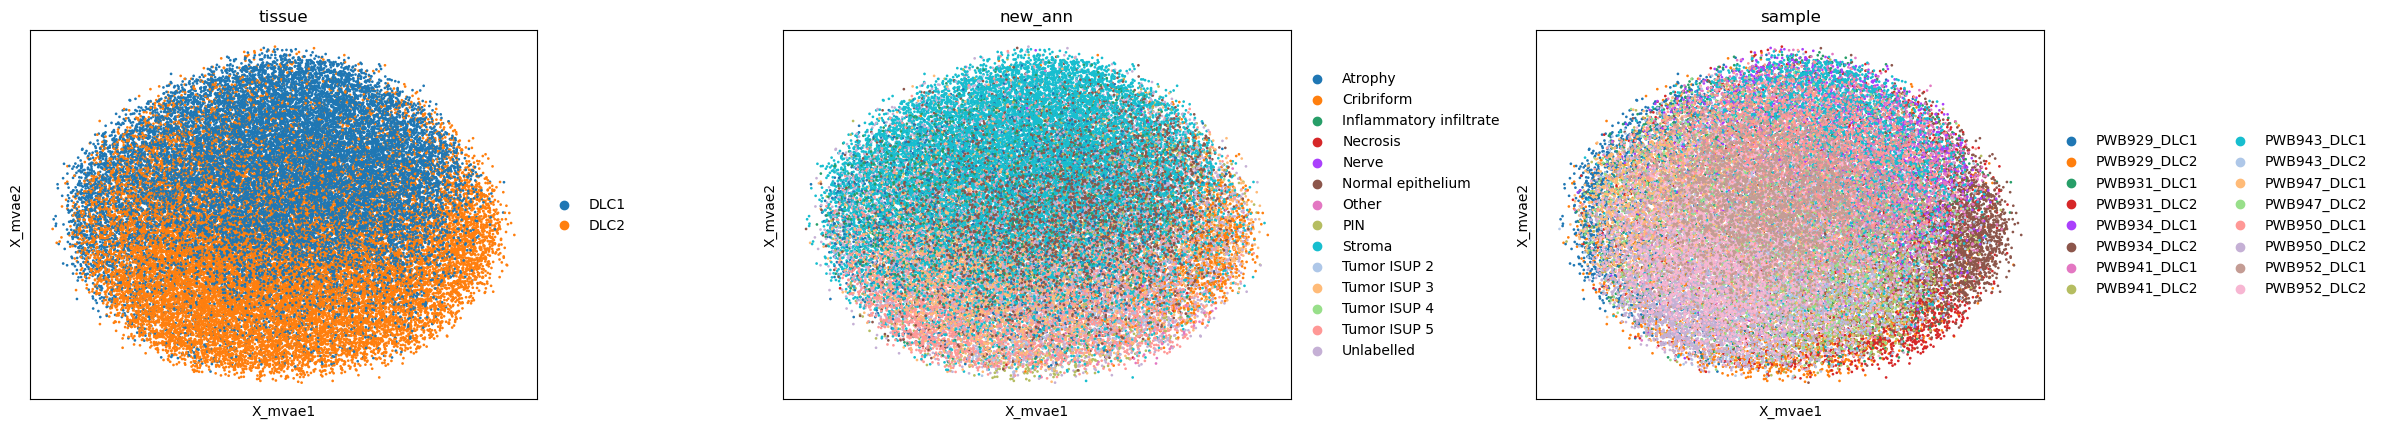

In [26]:
plot_embedding(model, mdata, train_params=train_params, poe_only=False)

In [7]:
# beta=0.01
train_params = TrainParams(add_lisi_loss=False, train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="smvae_prostate_nolisi_fullshared")
model_params = ModelParams(beta=0.01, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)
model = SMVAE(mdata, model_params)

(42475, 18950)
(42475, 12510)


In [8]:
train_smvae(model, mdata, "sample", train_params)

# model.load_state_dict(torch.load("vae_params/smvae_prostate_nolisi_fullshared_20230429-174252.pt"))

Train data size: 33980
Test data size: 8495


100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:34<00:00,  2.80it/s]

EarlyStopping (epoch: 1): train loss improved to 0.05379072634032925



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:17<00:00,  3.93it/s]

EarlyStopping (epoch: 1): valid loss improved to 3.2123730894344957



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:28<00:00,  2.99it/s]

EarlyStopping (epoch: 2): train loss improved to 0.022003511290749497



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:19<00:00,  3.44it/s]

EarlyStopping (epoch: 2): valid loss improved to 2.529214353703741



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:19<00:00,  3.36it/s]

EarlyStopping (epoch: 3): valid loss improved to 2.2975128088424457



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:19<00:00,  3.53it/s]

EarlyStopping (epoch: 4): valid loss improved to 2.120708956647275



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:17<00:00,  3.93it/s]

EarlyStopping (epoch: 5): valid loss improved to 1.993575430628079



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:18<00:00,  3.55it/s]

EarlyStopping (epoch: 6): valid loss improved to 1.9313544123920041



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:18<00:00,  3.67it/s]

EarlyStopping (epoch: 7): valid loss improved to 1.8850231544295353



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:17<00:00,  3.83it/s]

EarlyStopping (epoch: 8): valid loss improved to 1.8513226099868318



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:17<00:00,  3.75it/s]

EarlyStopping (epoch: 9): valid loss improved to 1.8249132170606015



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:17<00:00,  3.78it/s]

EarlyStopping (epoch: 10): valid loss improved to 1.8033234130090743



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:18<00:00,  3.69it/s]

EarlyStopping (epoch: 11): valid loss improved to 1.779852214144237



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:33<00:00,  2.86it/s]

EarlyStopping (epoch: 12): train loss hasn't improved: 0.014565426805848722. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:20<00:00,  3.35it/s]

EarlyStopping (epoch: 12): valid loss improved to 1.7641583947993036



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:31<00:00,  2.90it/s]

EarlyStopping (epoch: 13): train loss hasn't improved: 0.014451170672803434. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:17<00:00,  3.90it/s]

EarlyStopping (epoch: 13): valid loss improved to 1.746859868960594



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:34<00:00,  2.82it/s]

EarlyStopping (epoch: 14): train loss hasn't improved: 0.014355433762529585. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:27<00:00,  3.05it/s]

EarlyStopping (epoch: 15): train loss hasn't improved: 0.014290515740806036. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:17<00:00,  3.75it/s]

EarlyStopping (epoch: 15): valid loss improved to 1.7335327045241398



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:34<00:00,  2.80it/s]

EarlyStopping (epoch: 16): train loss hasn't improved: 0.014218219155209986. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:29<00:00,  2.97it/s]

EarlyStopping (epoch: 17): train loss hasn't improved: 0.01416900248440523. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:18<00:00,  3.55it/s]

EarlyStopping (epoch: 17): valid loss improved to 1.716576252410661



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:31<00:00,  2.90it/s]

EarlyStopping (epoch: 18): train loss hasn't improved: 0.014115928652849248. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:30<00:00,  2.93it/s]

EarlyStopping (epoch: 19): train loss hasn't improved: 0.01407751377152302. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:35<00:00,  2.77it/s]

EarlyStopping (epoch: 20): train loss hasn't improved: 0.014016911957529169. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:16<00:00,  4.16it/s]

EarlyStopping (epoch: 20): valid loss improved to 1.7020197804294415



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:34<00:00,  2.80it/s]

EarlyStopping (epoch: 21): train loss hasn't improved: 0.014006329586114372. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:43<00:00,  2.58it/s]

EarlyStopping (epoch: 22): train loss hasn't improved: 0.013970563683950459. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:33<00:00,  2.84it/s]

EarlyStopping (epoch: 23): train loss hasn't improved: 0.013942399857814624. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:28<00:00,  3.01it/s]

EarlyStopping (epoch: 24): train loss hasn't improved: 0.013917266996275894. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:17<00:00,  3.85it/s]

EarlyStopping (epoch: 24): valid loss improved to 1.689995820842572



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:33<00:00,  2.84it/s]

EarlyStopping (epoch: 25): train loss hasn't improved: 0.013904995704974197. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:30<00:00,  2.92it/s]

EarlyStopping (epoch: 26): train loss hasn't improved: 0.013879451402991993. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:31<00:00,  2.92it/s]

EarlyStopping (epoch: 27): train loss hasn't improved: 0.013859244372439145. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:40<00:00,  2.65it/s]

EarlyStopping (epoch: 28): train loss hasn't improved: 0.013841095526405051. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:36<00:00,  2.76it/s]

EarlyStopping (epoch: 29): train loss hasn't improved: 0.01384001337408388. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:29<00:00,  2.96it/s]

EarlyStopping (epoch: 30): train loss hasn't improved: 0.013818027697429017. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:18<00:00,  3.54it/s]

EarlyStopping (epoch: 30): valid loss improved to 1.6742557803196694



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:29<00:00,  2.98it/s]

EarlyStopping (epoch: 31): train loss hasn't improved: 0.01379968107553564. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:26<00:00,  3.09it/s]

EarlyStopping (epoch: 32): train loss hasn't improved: 0.013800221660545533. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:35<00:00,  2.77it/s]

EarlyStopping (epoch: 33): train loss hasn't improved: 0.013783914219147321. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:23<00:00,  3.18it/s]

EarlyStopping (epoch: 34): train loss hasn't improved: 0.0137738772811014. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:29<00:00,  2.97it/s]

EarlyStopping (epoch: 35): train loss hasn't improved: 0.013766232025910995. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:39<00:00,  2.68it/s]

EarlyStopping (epoch: 36): train loss hasn't improved: 0.013760860282719452. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:28<00:00,  3.01it/s]

EarlyStopping (epoch: 37): train loss hasn't improved: 0.013758049448354586. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:36<00:00,  2.76it/s]

EarlyStopping (epoch: 38): train loss hasn't improved: 0.01374155339105751. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:34<00:00,  2.81it/s]

EarlyStopping (epoch: 39): train loss hasn't improved: 0.01373348416757275. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:29<00:00,  2.97it/s]

EarlyStopping (epoch: 40): train loss hasn't improved: 0.013724036841900508. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:16<00:00,  3.98it/s]

EarlyStopping (epoch: 40): valid loss hasn't improved: 1.674672423903622. Stopping.


{'train_loss': [0.05379072634032925,
  0.022003511290749497,
  0.019416002654692507,
  0.017702855461832354,
  0.01660792040361805,
  0.01598835262640425,
  0.01559039682693661,
  0.015315608240843801,
  0.015086522500188018,
  0.014881853870674748,
  0.014713043409491231,
  0.014565426805848722,
  0.014451170672803434,
  0.014355433762529585,
  0.014290515740806036,
  0.014218219155209986,
  0.01416900248440523,
  0.014115928652849248,
  0.01407751377152302,
  0.014016911957529169,
  0.014006329586114372,
  0.013970563683950459,
  0.013942399857814624,
  0.013917266996275894,
  0.013904995704974197,
  0.013879451402991993,
  0.013859244372439145,
  0.013841095526405051,
  0.01384001337408388,
  0.013818027697429017,
  0.01379968107553564,
  0.013800221660545533,
  0.013783914219147321,
  0.0137738772811014,
  0.013766232025910995,
  0.013760860282719452,
  0.013758049448354586,
  0.01374155339105751,
  0.01373348416757275,
  0.013724036841900508],
 'valid_loss': [3.2123730894344957,
 

In [ ]:
plot_embedding(model, mdata, train_params=train_params, poe_only=False)

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


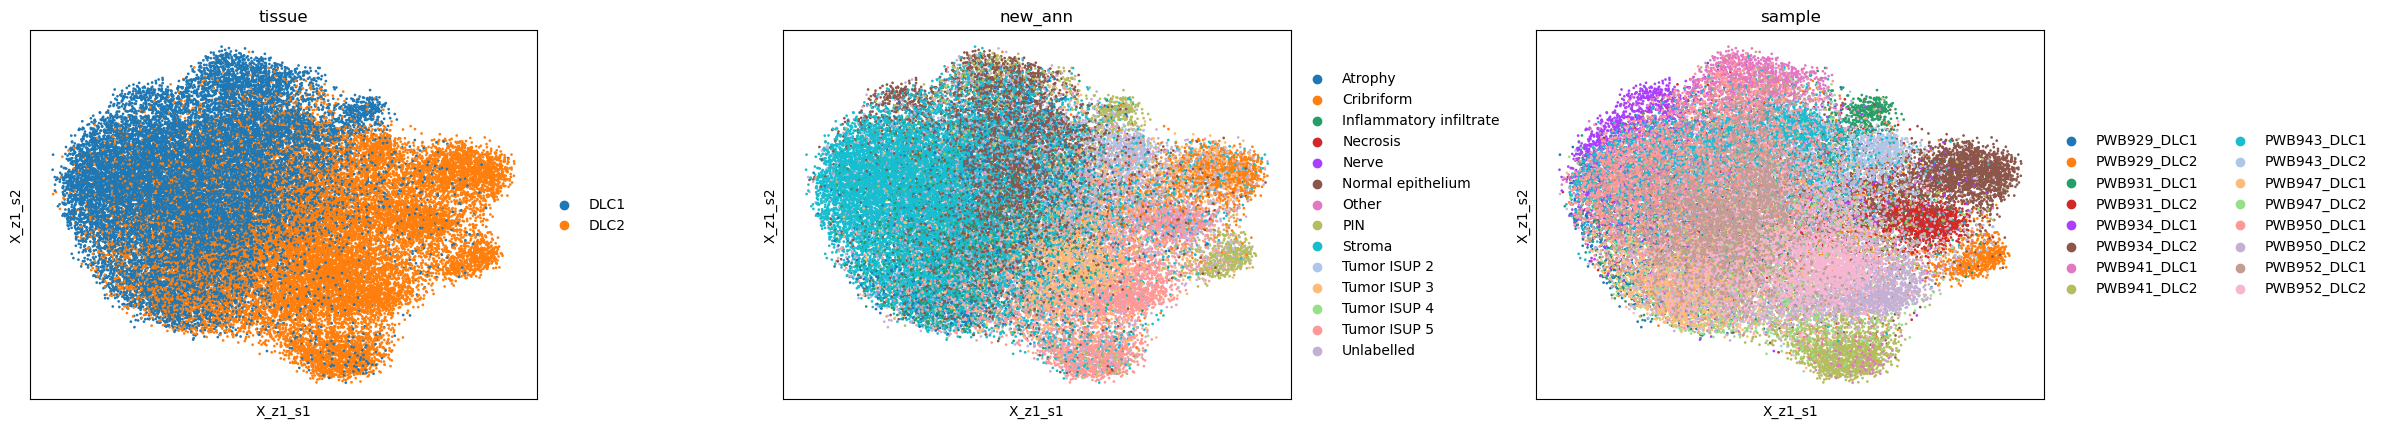

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


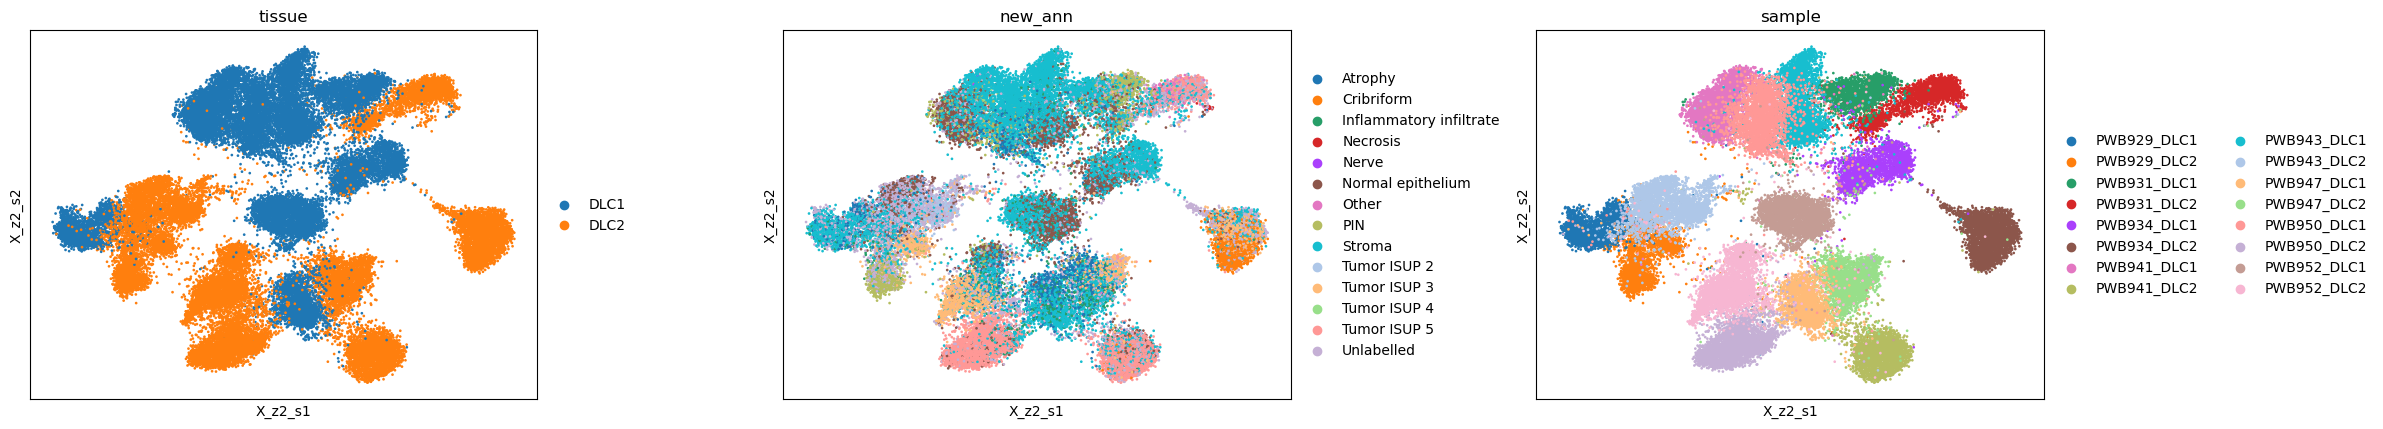

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


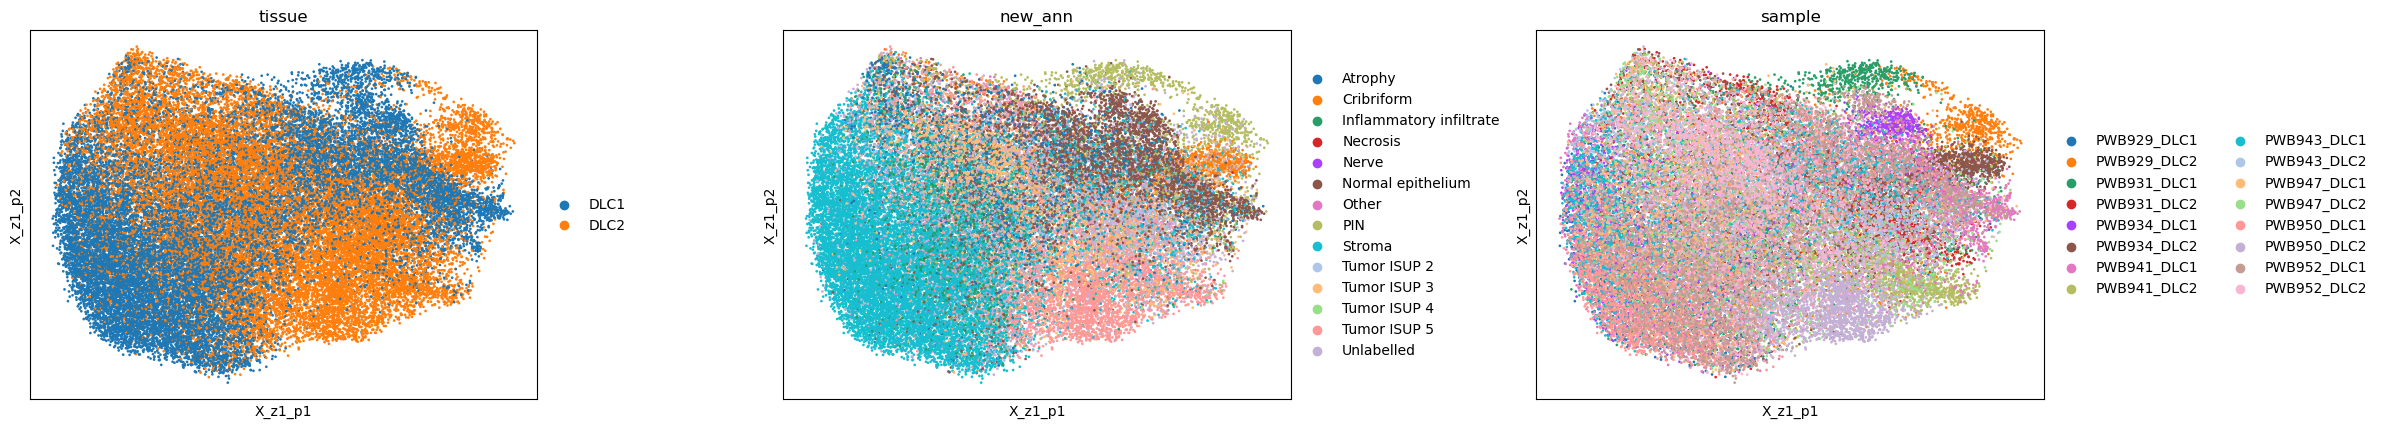

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


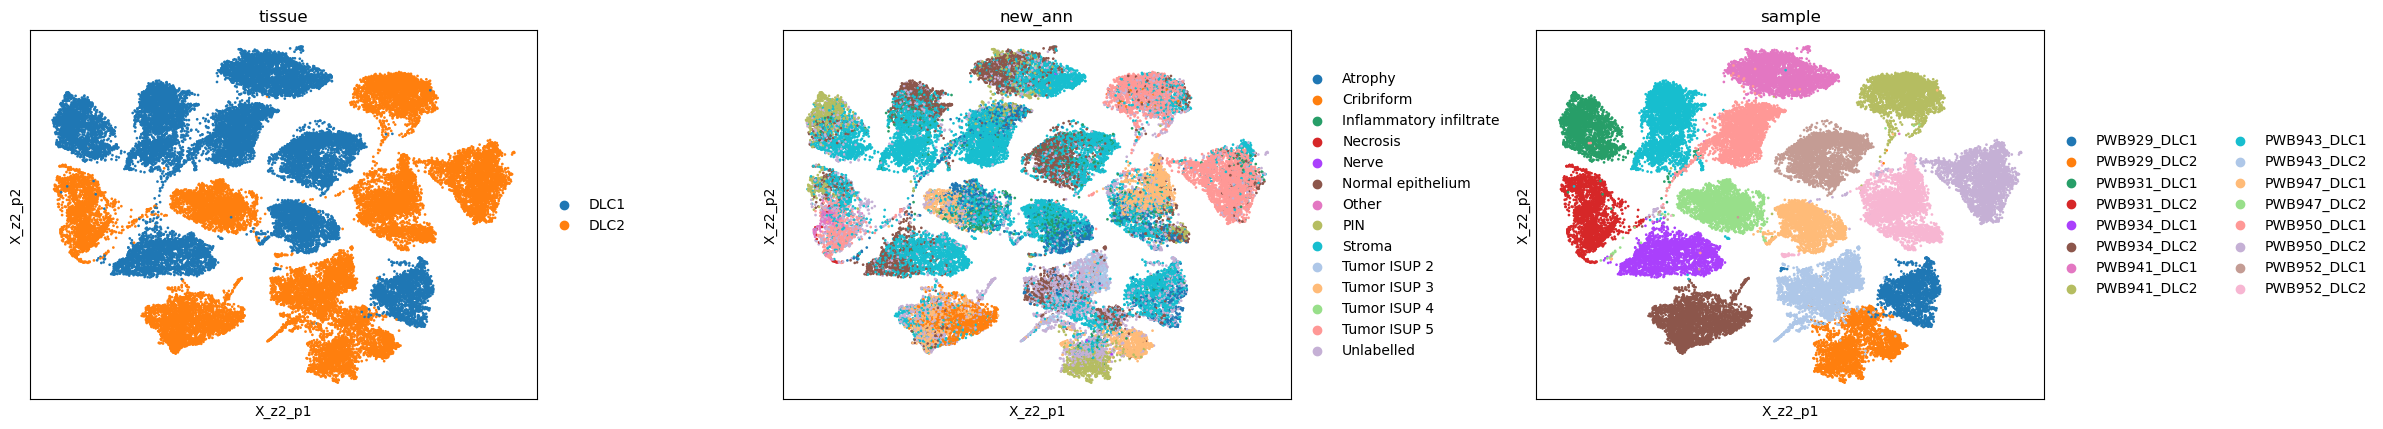

In [10]:
for layer in ["X_z1_s", "X_z2_s", "X_z1_p", "X_z2_p"]:
    sc.pl.embedding(
            mdata,
            layer,
            color=["tissue", "new_ann", "sample"],
            size=15,
            wspace=0.35,
        )

In [7]:
## beta=0.001
train_params = TrainParams(add_lisi_loss=False, train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="smvae_prostate_nolisi_beta0.001")
model_params = ModelParams(beta=0.001, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)
model = SMVAE(mdata, model_params)

(42475, 18950)
(42475, 12510)


In [8]:
train_smvae(model, mdata, "sample", train_params)

# model.load_state_dict(torch.load("vae_params/smvae_prostate_nolisi_fullshared_20230429-174252.pt"))

Train data size: 33980
Test data size: 8495


100%|█████████████████████████████████████████| 266/266 [01:02<00:00,  4.25it/s]

EarlyStopping (epoch: 1): train loss improved to 0.05340567905808842



100%|███████████████████████████████████████████| 67/67 [00:14<00:00,  4.65it/s]

EarlyStopping (epoch: 1): valid loss improved to 3.1048764435213005



100%|█████████████████████████████████████████| 266/266 [01:01<00:00,  4.30it/s]

EarlyStopping (epoch: 2): train loss improved to 0.021696117290543975



100%|███████████████████████████████████████████| 67/67 [00:14<00:00,  4.58it/s]

EarlyStopping (epoch: 2): valid loss improved to 2.4809359578943964



100%|███████████████████████████████████████████| 67/67 [00:14<00:00,  4.69it/s]

EarlyStopping (epoch: 3): valid loss improved to 2.2854015969518406



100%|███████████████████████████████████████████| 67/67 [00:14<00:00,  4.55it/s]

EarlyStopping (epoch: 4): valid loss improved to 2.0874262140758



100%|███████████████████████████████████████████| 67/67 [00:16<00:00,  4.19it/s]

EarlyStopping (epoch: 5): valid loss improved to 1.9773557791069372



100%|███████████████████████████████████████████| 67/67 [00:14<00:00,  4.73it/s]

EarlyStopping (epoch: 6): valid loss improved to 1.917968805156537



100%|███████████████████████████████████████████| 67/67 [00:15<00:00,  4.35it/s]

EarlyStopping (epoch: 7): valid loss improved to 1.8577152882049333



100%|███████████████████████████████████████████| 67/67 [00:16<00:00,  4.15it/s]

EarlyStopping (epoch: 8): valid loss improved to 1.8274256720471738



100%|███████████████████████████████████████████| 67/67 [00:14<00:00,  4.54it/s]

EarlyStopping (epoch: 9): valid loss improved to 1.7933846516395682



100%|███████████████████████████████████████████| 67/67 [00:15<00:00,  4.35it/s]

EarlyStopping (epoch: 10): valid loss improved to 1.7786886353990925



100%|███████████████████████████████████████████| 67/67 [00:14<00:00,  4.52it/s]

EarlyStopping (epoch: 11): valid loss improved to 1.7470882312575382



100%|█████████████████████████████████████████| 266/266 [01:02<00:00,  4.27it/s]

EarlyStopping (epoch: 12): train loss hasn't improved: 0.01424704819584398. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:02<00:00,  4.27it/s]

EarlyStopping (epoch: 13): train loss hasn't improved: 0.014138723524827828. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:14<00:00,  4.50it/s]

EarlyStopping (epoch: 13): valid loss improved to 1.7336974980226203



100%|█████████████████████████████████████████| 266/266 [01:00<00:00,  4.36it/s]

EarlyStopping (epoch: 14): train loss hasn't improved: 0.014051706303983242. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:14<00:00,  4.48it/s]

EarlyStopping (epoch: 14): valid loss improved to 1.7104675413957282



100%|█████████████████████████████████████████| 266/266 [01:02<00:00,  4.24it/s]

EarlyStopping (epoch: 15): train loss hasn't improved: 0.013962299705183177. Stopping.



100%|█████████████████████████████████████████| 266/266 [00:58<00:00,  4.52it/s]

EarlyStopping (epoch: 16): train loss hasn't improved: 0.013902692271373494. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:00<00:00,  4.43it/s]

EarlyStopping (epoch: 17): train loss hasn't improved: 0.013841755422442854. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:14<00:00,  4.62it/s]

EarlyStopping (epoch: 17): valid loss improved to 1.6905003181144374



100%|█████████████████████████████████████████| 266/266 [01:09<00:00,  3.82it/s]

EarlyStopping (epoch: 18): train loss hasn't improved: 0.013790981032134084. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:05<00:00,  4.04it/s]

EarlyStopping (epoch: 19): train loss hasn't improved: 0.013746111462437594. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:15<00:00,  4.38it/s]

EarlyStopping (epoch: 19): valid loss improved to 1.6802973106725891



100%|█████████████████████████████████████████| 266/266 [01:01<00:00,  4.33it/s]

EarlyStopping (epoch: 20): train loss hasn't improved: 0.013711295165055776. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:03<00:00,  4.19it/s]

EarlyStopping (epoch: 21): train loss hasn't improved: 0.01367268509342784. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:01<00:00,  4.32it/s]

EarlyStopping (epoch: 22): train loss hasn't improved: 0.013657205402324872. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:14<00:00,  4.60it/s]

EarlyStopping (epoch: 22): valid loss improved to 1.6673020818340245



100%|█████████████████████████████████████████| 266/266 [00:59<00:00,  4.47it/s]

EarlyStopping (epoch: 23): train loss hasn't improved: 0.013627390734513694. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:01<00:00,  4.29it/s]

EarlyStopping (epoch: 24): train loss hasn't improved: 0.013605302979203798. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:00<00:00,  4.37it/s]

EarlyStopping (epoch: 25): train loss hasn't improved: 0.013588139879626341. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:04<00:00,  4.10it/s]

EarlyStopping (epoch: 26): train loss hasn't improved: 0.01356946290626885. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:06<00:00,  4.02it/s]

EarlyStopping (epoch: 27): train loss hasn't improved: 0.013560091119573143. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:16<00:00,  3.98it/s]

EarlyStopping (epoch: 27): valid loss improved to 1.65624622266684



100%|█████████████████████████████████████████| 266/266 [01:00<00:00,  4.38it/s]

EarlyStopping (epoch: 28): train loss hasn't improved: 0.013536909704982988. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:00<00:00,  4.40it/s]

EarlyStopping (epoch: 29): train loss hasn't improved: 0.013525295889047821. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:00<00:00,  4.43it/s]

EarlyStopping (epoch: 30): train loss hasn't improved: 0.013514179587715018. Stopping.



100%|█████████████████████████████████████████| 266/266 [00:59<00:00,  4.44it/s]

EarlyStopping (epoch: 31): train loss hasn't improved: 0.013495579104061475. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:04<00:00,  4.14it/s]

EarlyStopping (epoch: 32): train loss hasn't improved: 0.0134925775664073. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:00<00:00,  4.42it/s]

EarlyStopping (epoch: 33): train loss hasn't improved: 0.01348505859658464. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:00<00:00,  4.40it/s]

EarlyStopping (epoch: 34): train loss hasn't improved: 0.013474959952470623. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:04<00:00,  4.14it/s]

EarlyStopping (epoch: 35): train loss hasn't improved: 0.013462704511303422. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:15<00:00,  4.45it/s]

EarlyStopping (epoch: 35): valid loss improved to 1.6413215025147396



100%|█████████████████████████████████████████| 266/266 [00:58<00:00,  4.52it/s]

EarlyStopping (epoch: 36): train loss hasn't improved: 0.013451488653725214. Stopping.



100%|█████████████████████████████████████████| 266/266 [00:59<00:00,  4.46it/s]

EarlyStopping (epoch: 37): train loss hasn't improved: 0.013440502307357475. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:01<00:00,  4.31it/s]

EarlyStopping (epoch: 38): train loss hasn't improved: 0.013434312661442075. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:00<00:00,  4.43it/s]

EarlyStopping (epoch: 39): train loss hasn't improved: 0.013439719732401299. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:01<00:00,  4.33it/s]

EarlyStopping (epoch: 40): train loss hasn't improved: 0.013423201341780584. Stopping.



100%|█████████████████████████████████████████| 266/266 [00:59<00:00,  4.48it/s]

EarlyStopping (epoch: 41): train loss hasn't improved: 0.013418755764958436. Stopping.



100%|█████████████████████████████████████████| 266/266 [00:58<00:00,  4.54it/s]

EarlyStopping (epoch: 42): train loss hasn't improved: 0.013408520268720343. Stopping.



100%|█████████████████████████████████████████| 266/266 [00:59<00:00,  4.50it/s]

EarlyStopping (epoch: 43): train loss hasn't improved: 0.013402471779514018. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:03<00:00,  4.22it/s]

EarlyStopping (epoch: 44): train loss hasn't improved: 0.013400174306377795. Stopping.



100%|█████████████████████████████████████████| 266/266 [01:01<00:00,  4.31it/s]

EarlyStopping (epoch: 45): train loss hasn't improved: 0.013396191347901298. Stopping.



100%|███████████████████████████████████████████| 67/67 [00:14<00:00,  4.51it/s]

EarlyStopping (epoch: 45): valid loss hasn't improved: 1.643119844038095. Stopping.


{'train_loss': [0.05340567905808842,
  0.021696117290543975,
  0.01904005378467185,
  0.017453454135795982,
  0.016342628465251686,
  0.01573433352260466,
  0.015330318646125052,
  0.015003118524136019,
  0.014769162231504812,
  0.014568944385011032,
  0.014385816484707254,
  0.01424704819584398,
  0.014138723524827828,
  0.014051706303983242,
  0.013962299705183177,
  0.013902692271373494,
  0.013841755422442854,
  0.013790981032134084,
  0.013746111462437594,
  0.013711295165055776,
  0.01367268509342784,
  0.013657205402324872,
  0.013627390734513694,
  0.013605302979203798,
  0.013588139879626341,
  0.01356946290626885,
  0.013560091119573143,
  0.013536909704982988,
  0.013525295889047821,
  0.013514179587715018,
  0.013495579104061475,
  0.0134925775664073,
  0.01348505859658464,
  0.013474959952470623,
  0.013462704511303422,
  0.013451488653725214,
  0.013440502307357475,
  0.013434312661442075,
  0.013439719732401299,
  0.013423201341780584,
  0.013418755764958436,
  0.0134085

## LISI

### 1. LISI on PoE

### beta=0.001, gamma=0.001

In [15]:
train_params = TrainParams(train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="smvae_prostate_lisi_poe_beta0.001_gamma0.001")
model_params = ModelParams(beta=0.001, gamma=0.001, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)
model = SMVAE(mdata, model_params)

(42475, 18950)
(42475, 12510)


In [16]:
# train_smvae(model, mdata, "sample", train_params)
model.load_state_dict(torch.load("vae_params/smvae_prostate_lisi_poe_beta0.001_gamma0.001_20230502-001455.pt"))

<All keys matched successfully>

100%|██████████████████████████████████████████████████████████████████████| 332/332 [00:31<00:00, 10.43it/s]
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


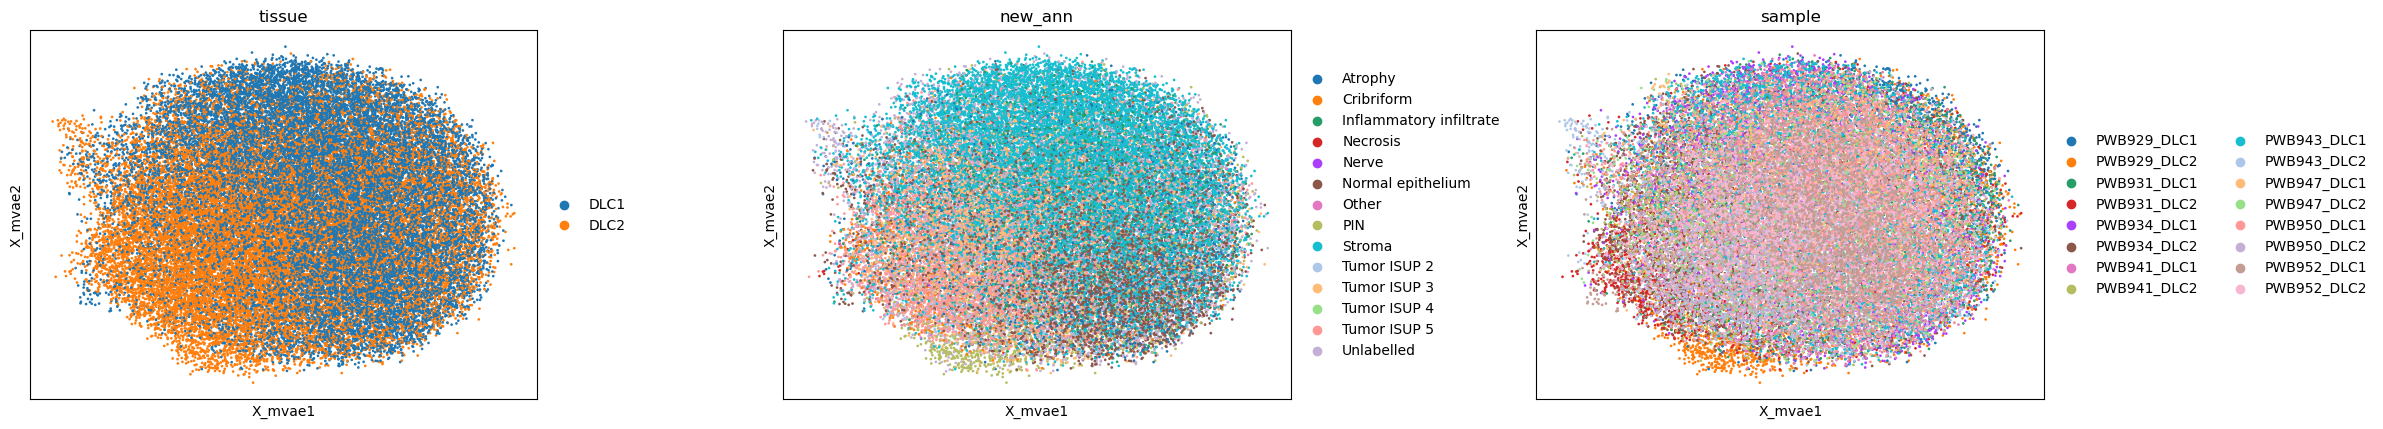

In [17]:
plot_embedding(model, mdata, train_params=train_params, poe_only=False)

### beta=0.001, gamma=0.0005

In [18]:
train_params = TrainParams(train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="smvae_prostate_lisi_poe_beta0.001_gamma0.0005")
model_params = ModelParams(beta=0.001, gamma=0.0005, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)
model = SMVAE(mdata, model_params)

(42475, 18950)
(42475, 12510)


In [19]:
train_smvae(model, mdata, "sample", train_params)

Train data size: 33980
Test data size: 8495


100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:04<00:00,  1.44it/s]

EarlyStopping (epoch: 1): train loss improved to 0.05299635176942095



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:39<00:00,  1.69it/s]

EarlyStopping (epoch: 1): valid loss improved to 3.168175206255557



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:09<00:00,  1.41it/s]

EarlyStopping (epoch: 2): train loss improved to 0.021974668936423514



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:45<00:00,  1.48it/s]

EarlyStopping (epoch: 2): valid loss improved to 2.557393807083813



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:41<00:00,  1.61it/s]

EarlyStopping (epoch: 3): valid loss improved to 2.3349415508668816



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:41<00:00,  1.61it/s]

EarlyStopping (epoch: 4): valid loss improved to 2.1932094702080116



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:41<00:00,  1.62it/s]

EarlyStopping (epoch: 5): valid loss improved to 2.0251930969864573



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:41<00:00,  1.62it/s]

EarlyStopping (epoch: 6): valid loss improved to 1.944663013984908



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:41<00:00,  1.62it/s]

EarlyStopping (epoch: 7): valid loss improved to 1.8837352848764677



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:41<00:00,  1.62it/s]

EarlyStopping (epoch: 8): valid loss improved to 1.8459215431071039



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:41<00:00,  1.61it/s]

EarlyStopping (epoch: 9): valid loss improved to 1.8246788035577803



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:41<00:00,  1.63it/s]

EarlyStopping (epoch: 10): valid loss improved to 1.8008107320586246



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:41<00:00,  1.61it/s]

EarlyStopping (epoch: 11): valid loss improved to 1.7768983431716463



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:10<00:00,  1.40it/s]

EarlyStopping (epoch: 12): train loss hasn't improved: 0.014436608012666977. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:41<00:00,  1.61it/s]

EarlyStopping (epoch: 12): valid loss improved to 1.7594140358825228



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:11<00:00,  1.39it/s]

EarlyStopping (epoch: 13): train loss hasn't improved: 0.014334440329553381. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:12<00:00,  1.38it/s]

EarlyStopping (epoch: 14): train loss hasn't improved: 0.01423306725458793. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:42<00:00,  1.60it/s]

EarlyStopping (epoch: 14): valid loss improved to 1.7392520513107528



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:12<00:00,  1.38it/s]

EarlyStopping (epoch: 15): train loss hasn't improved: 0.014145787292680297. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:42<00:00,  1.59it/s]

EarlyStopping (epoch: 15): valid loss improved to 1.7241313742167914



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:10<00:00,  1.39it/s]

EarlyStopping (epoch: 16): train loss hasn't improved: 0.014095541433140136. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:12<00:00,  1.38it/s]

EarlyStopping (epoch: 17): train loss hasn't improved: 0.014017143980624607. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:41<00:00,  1.61it/s]

EarlyStopping (epoch: 17): valid loss improved to 1.7127663413090493



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:11<00:00,  1.39it/s]

EarlyStopping (epoch: 18): train loss hasn't improved: 0.013964868272452441. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:12<00:00,  1.38it/s]

EarlyStopping (epoch: 19): train loss hasn't improved: 0.013929139508297333. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:42<00:00,  1.59it/s]

EarlyStopping (epoch: 19): valid loss improved to 1.6996626640433696



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:10<00:00,  1.40it/s]

EarlyStopping (epoch: 20): train loss hasn't improved: 0.01388381249487856. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:11<00:00,  1.39it/s]

EarlyStopping (epoch: 21): train loss hasn't improved: 0.013845737500356323. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:13<00:00,  1.38it/s]

EarlyStopping (epoch: 22): train loss hasn't improved: 0.013824951417169688. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:10<00:00,  1.39it/s]

EarlyStopping (epoch: 23): train loss hasn't improved: 0.013796923773088056. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:41<00:00,  1.61it/s]

EarlyStopping (epoch: 23): valid loss improved to 1.6813520424401582



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:10<00:00,  1.39it/s]

EarlyStopping (epoch: 24): train loss hasn't improved: 0.013767693069417592. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:12<00:00,  1.39it/s]

EarlyStopping (epoch: 25): train loss hasn't improved: 0.013744357159868839. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:11<00:00,  1.39it/s]

EarlyStopping (epoch: 26): train loss hasn't improved: 0.013726002497136978. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:12<00:00,  1.38it/s]

EarlyStopping (epoch: 27): train loss hasn't improved: 0.01371056522742098. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:12<00:00,  1.38it/s]

EarlyStopping (epoch: 28): train loss hasn't improved: 0.013690959203937883. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:41<00:00,  1.60it/s]

EarlyStopping (epoch: 28): valid loss improved to 1.6693486437868716



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:11<00:00,  1.39it/s]

EarlyStopping (epoch: 29): train loss hasn't improved: 0.01367775263191322. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:13<00:00,  1.38it/s]

EarlyStopping (epoch: 30): train loss hasn't improved: 0.013675879063923405. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:13<00:00,  1.37it/s]

EarlyStopping (epoch: 31): train loss hasn't improved: 0.013665634242838589. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:11<00:00,  1.39it/s]

EarlyStopping (epoch: 32): train loss hasn't improved: 0.013640900763993827. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:10<00:00,  1.39it/s]

EarlyStopping (epoch: 33): train loss hasn't improved: 0.013639545398575197. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:11<00:00,  1.39it/s]

EarlyStopping (epoch: 34): train loss hasn't improved: 0.013628681127712122. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:12<00:00,  1.38it/s]

EarlyStopping (epoch: 35): train loss hasn't improved: 0.013625549501780554. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:11<00:00,  1.39it/s]

EarlyStopping (epoch: 36): train loss hasn't improved: 0.01361283799562123. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:12<00:00,  1.38it/s]

EarlyStopping (epoch: 37): train loss hasn't improved: 0.0136128340137924. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:12<00:00,  1.38it/s]

EarlyStopping (epoch: 38): train loss hasn't improved: 0.013611462415843378. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:41<00:00,  1.60it/s]

EarlyStopping (epoch: 38): valid loss hasn't improved: 1.6655614731916741. Stopping.


{'train_loss': [0.05299635176942095,
  0.021974668936423514,
  0.019409138795696616,
  0.017988532490418756,
  0.016751428893062914,
  0.015942227145796177,
  0.015498643762718726,
  0.015189302988512647,
  0.01493992723388627,
  0.014750922375247364,
  0.014581692369633945,
  0.014436608012666977,
  0.014334440329553381,
  0.01423306725458793,
  0.014145787292680297,
  0.014095541433140136,
  0.014017143980624607,
  0.013964868272452441,
  0.013929139508297333,
  0.01388381249487856,
  0.013845737500356323,
  0.013824951417169688,
  0.013796923773088056,
  0.013767693069417592,
  0.013744357159868839,
  0.013726002497136978,
  0.01371056522742098,
  0.013690959203937883,
  0.01367775263191322,
  0.013675879063923405,
  0.013665634242838589,
  0.013640900763993827,
  0.013639545398575197,
  0.013628681127712122,
  0.013625549501780554,
  0.01361283799562123,
  0.0136128340137924,
  0.013611462415843378],
 'valid_loss': [3.168175206255557,
  2.557393807083813,
  2.3349415508668816,
  2.

100%|██████████████████████████████████████████████████████████████████████| 332/332 [00:33<00:00,  9.93it/s]
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


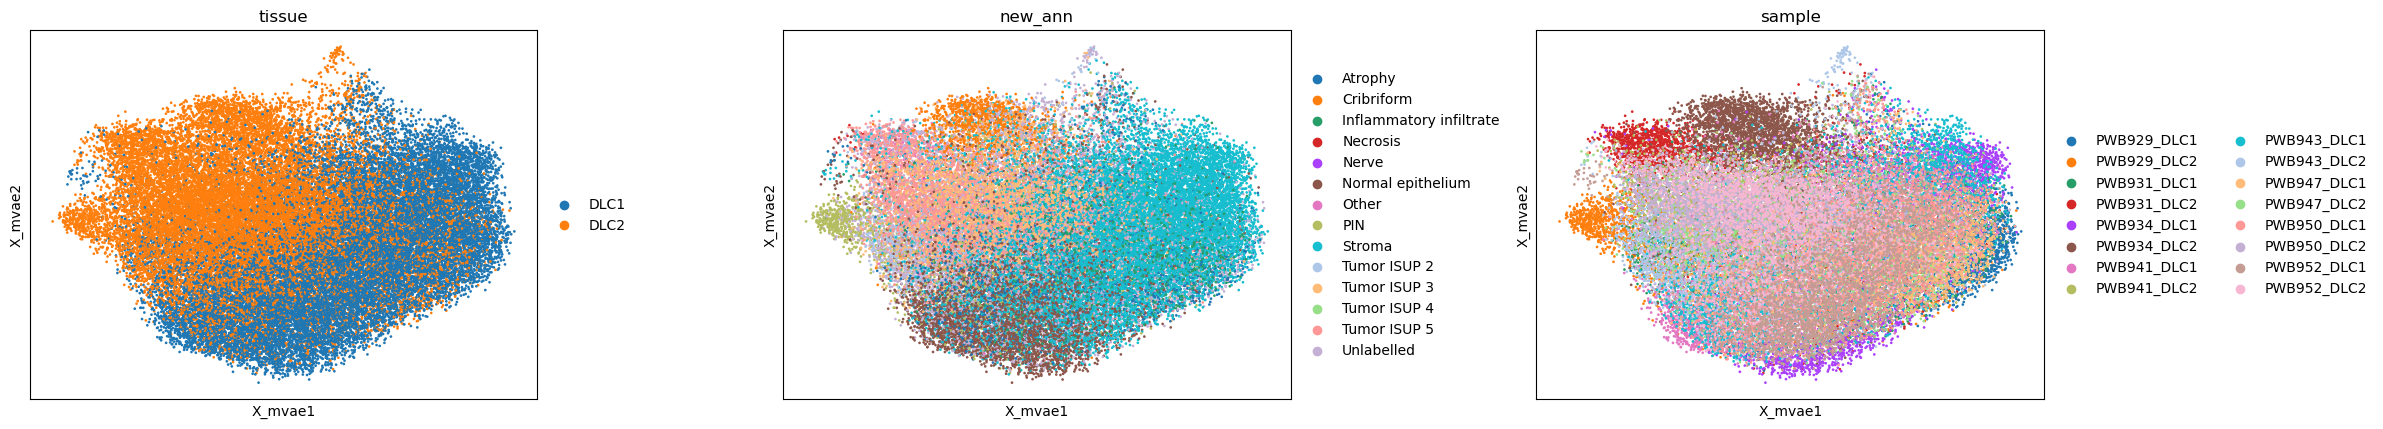

In [20]:
plot_embedding(model, mdata, train_params=train_params, poe_only=False)

In [ ]:
for layer in ["X_z1_s", "X_z2_s", "X_z1_p", "X_z2_p"]:
    sc.pl.embedding(
            mdata,
            layer,
            color=["tissue", "new_ann", "sample"],
            size=15,
            wspace=0.35,
        )

### beta=0.001, gamma=0.0003

In [16]:
train_params = TrainParams(train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="smvae_prostate_lisi_poe_beta0.001_gamma0.0003")
model_params = ModelParams(beta=0.001, gamma=0.0003, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)
model = SMVAE(mdata, model_params)

(42475, 18950)
(42475, 12510)


In [17]:
train_smvae(model, mdata, "sample", train_params)

Train data size: 33980
Test data size: 8495


100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:01<00:00,  1.46it/s]

EarlyStopping (epoch: 1): train loss improved to 0.05313965800651878



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:39<00:00,  1.70it/s]

EarlyStopping (epoch: 1): valid loss improved to 3.228502266442598



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:00<00:00,  1.47it/s]

EarlyStopping (epoch: 2): train loss improved to 0.021970594736181195



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:40<00:00,  1.65it/s]

EarlyStopping (epoch: 2): valid loss improved to 2.556779121285054



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:40<00:00,  1.64it/s]

EarlyStopping (epoch: 3): valid loss improved to 2.3033714365603317



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:41<00:00,  1.62it/s]

EarlyStopping (epoch: 4): valid loss improved to 2.1206944344648675



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:41<00:00,  1.62it/s]

EarlyStopping (epoch: 5): valid loss improved to 2.000250677564251



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:41<00:00,  1.63it/s]

EarlyStopping (epoch: 6): valid loss improved to 1.9274326224825276



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:40<00:00,  1.64it/s]

EarlyStopping (epoch: 7): valid loss improved to 1.872674488309604



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:41<00:00,  1.61it/s]

EarlyStopping (epoch: 8): valid loss improved to 1.844990611076355



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:41<00:00,  1.61it/s]

EarlyStopping (epoch: 9): valid loss improved to 1.8127666284788901



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:41<00:00,  1.63it/s]

EarlyStopping (epoch: 10): valid loss improved to 1.7859973266943177



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:41<00:00,  1.63it/s]

EarlyStopping (epoch: 11): valid loss improved to 1.7607985468053107



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:08<00:00,  1.41it/s]

EarlyStopping (epoch: 12): train loss hasn't improved: 0.014362558840021376. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:41<00:00,  1.63it/s]

EarlyStopping (epoch: 12): valid loss improved to 1.742793809122114



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:19<00:00,  1.33it/s]

EarlyStopping (epoch: 13): train loss hasn't improved: 0.014237704723985705. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:44<00:00,  1.52it/s]

EarlyStopping (epoch: 13): valid loss improved to 1.7303545208119635



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:25<00:00,  1.29it/s]

EarlyStopping (epoch: 14): train loss hasn't improved: 0.014152050839233847. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:48<00:00,  1.17it/s]

EarlyStopping (epoch: 15): train loss hasn't improved: 0.014090652210421953. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:52<00:00,  1.28it/s]

EarlyStopping (epoch: 15): valid loss improved to 1.7111497761598273



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:48<00:00,  1.16it/s]

EarlyStopping (epoch: 16): train loss hasn't improved: 0.014011196240458228. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:46<00:00,  1.18it/s]

EarlyStopping (epoch: 17): train loss hasn't improved: 0.013954291159858277. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:51<00:00,  1.31it/s]

EarlyStopping (epoch: 17): valid loss improved to 1.699939142412214



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:10<00:00,  1.39it/s]

EarlyStopping (epoch: 18): train loss hasn't improved: 0.013912512019074896. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:07<00:00,  1.42it/s]

EarlyStopping (epoch: 19): train loss hasn't improved: 0.01386865552837109. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:08<00:00,  1.41it/s]

EarlyStopping (epoch: 20): train loss hasn't improved: 0.013832533720874169. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:45<00:00,  1.46it/s]

EarlyStopping (epoch: 20): valid loss improved to 1.680728567180349



100%|██████████████████████████████████████████████████████████████████████| 266/266 [04:03<00:00,  1.09it/s]

EarlyStopping (epoch: 21): train loss hasn't improved: 0.01381509253528274. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:48<00:00,  1.17it/s]

EarlyStopping (epoch: 22): train loss hasn't improved: 0.013774804875316024. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:48<00:00,  1.17it/s]

EarlyStopping (epoch: 23): train loss hasn't improved: 0.013753548003141146. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:08<00:00,  1.41it/s]

EarlyStopping (epoch: 24): train loss hasn't improved: 0.013721897824502399. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:54<00:00,  1.13it/s]

EarlyStopping (epoch: 25): train loss hasn't improved: 0.013701652884132515. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:48<00:00,  1.16it/s]

EarlyStopping (epoch: 26): train loss hasn't improved: 0.013676066297583892. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:53<00:00,  1.14it/s]

EarlyStopping (epoch: 27): train loss hasn't improved: 0.013669766356764014. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:49<00:00,  1.36it/s]

EarlyStopping (epoch: 27): valid loss improved to 1.666899814534543



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:50<00:00,  1.16it/s]

EarlyStopping (epoch: 28): train loss hasn't improved: 0.01365245519981025. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:50<00:00,  1.15it/s]

EarlyStopping (epoch: 29): train loss hasn't improved: 0.013641322037975813. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:43<00:00,  1.19it/s]

EarlyStopping (epoch: 30): train loss hasn't improved: 0.013621589978208537. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:58<00:00,  1.12it/s]

EarlyStopping (epoch: 31): train loss hasn't improved: 0.013614381791003105. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:49<00:00,  1.16it/s]

EarlyStopping (epoch: 32): train loss hasn't improved: 0.013613205674537986. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:44<00:00,  1.18it/s]

EarlyStopping (epoch: 33): train loss hasn't improved: 0.01359079702592303. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:49<00:00,  1.16it/s]

EarlyStopping (epoch: 34): train loss hasn't improved: 0.013600088284954456. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:49<00:00,  1.36it/s]

EarlyStopping (epoch: 34): valid loss improved to 1.6559717815313766



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:47<00:00,  1.17it/s]

EarlyStopping (epoch: 35): train loss hasn't improved: 0.01358024881754713. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:53<00:00,  1.14it/s]

EarlyStopping (epoch: 36): train loss hasn't improved: 0.013577394460214455. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:49<00:00,  1.16it/s]

EarlyStopping (epoch: 37): train loss hasn't improved: 0.01356645797265846. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:51<00:00,  1.15it/s]

EarlyStopping (epoch: 38): train loss hasn't improved: 0.013562021987307696. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:52<00:00,  1.15it/s]

EarlyStopping (epoch: 39): train loss hasn't improved: 0.013548911729933865. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:47<00:00,  1.17it/s]

EarlyStopping (epoch: 40): train loss hasn't improved: 0.013545012498617594. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:50<00:00,  1.15it/s]

EarlyStopping (epoch: 41): train loss hasn't improved: 0.01353374751544546. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:49<00:00,  1.16it/s]

EarlyStopping (epoch: 42): train loss hasn't improved: 0.01354296644201273. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:52<00:00,  1.14it/s]

EarlyStopping (epoch: 43): train loss hasn't improved: 0.013534105774793574. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:50<00:00,  1.15it/s]

EarlyStopping (epoch: 44): train loss hasn't improved: 0.013527678148826478. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:50<00:00,  1.32it/s]

EarlyStopping (epoch: 44): valid loss hasn't improved: 1.6545488104891422. Stopping.


{'train_loss': [0.05313965800651878,
  0.021970594736181195,
  0.019307482474126697,
  0.017631646596101398,
  0.01653951180900385,
  0.015881403184344025,
  0.015477155393681294,
  0.015162302175643095,
  0.014896657008714996,
  0.014685474310712718,
  0.01451525892349746,
  0.014362558840021376,
  0.014237704723985705,
  0.014152050839233847,
  0.014090652210421953,
  0.014011196240458228,
  0.013954291159858277,
  0.013912512019074896,
  0.01386865552837109,
  0.013832533720874169,
  0.01381509253528274,
  0.013774804875316024,
  0.013753548003141146,
  0.013721897824502399,
  0.013701652884132515,
  0.013676066297583892,
  0.013669766356764014,
  0.01365245519981025,
  0.013641322037975813,
  0.013621589978208537,
  0.013614381791003105,
  0.013613205674537986,
  0.01359079702592303,
  0.013600088284954456,
  0.01358024881754713,
  0.013577394460214455,
  0.01356645797265846,
  0.013562021987307696,
  0.013548911729933865,
  0.013545012498617594,
  0.01353374751544546,
  0.01354296

In [ ]:
plot_embedding(model, mdata, train_params=train_params, poe_only=False)

In [ ]:
for layer in ["X_z1_s", "X_z2_s", "X_z1_p", "X_z2_p"]:
    sc.pl.embedding(
            mdata,
            layer,
            color=["tissue", "new_ann", "sample"],
            size=15,
            wspace=0.35,
        )

### beta=0.001, gamma=0.0001

In [11]:
train_params = TrainParams(train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="smvae_prostate_lisi_poe_beta0.001_gamma0.0001")
model_params = ModelParams(beta=0.001, gamma=0.0001, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)
model = SMVAE(mdata, model_params)

(42475, 18950)
(42475, 12510)


In [12]:
model.load_state_dict(torch.load("vae_params/smvae_prostate_lisi_poe_beta0.001_gamma0.0001_20230502-031102.pt"))

<All keys matched successfully>

In [ ]:
plot_embedding(model, mdata, train_params=train_params, poe_only=False)

In [ ]:
for layer in ["X_z1_s", "X_z2_s", "X_z1_p", "X_z2_p"]:
    sc.pl.embedding(
            mdata,
            layer,
            color=["tissue", "new_ann", "sample"],
            size=15,
            wspace=0.35,
        )

## 2. LISI in PoE, 1/LISI on privates

### beta=0.001, gamma=0.0001, delta=0.1

In [7]:
train_params = TrainParams(inverse_lisi_on_private=True, train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="smvae_prostate_lisi_private_beta0.001_gamma0.0001_delta0.1")
model_params = ModelParams(beta=0.001, gamma=0.0001, delta=0.1, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)
model = SMVAE(mdata, model_params)

(42475, 18950)
(42475, 12510)


In [8]:
train_smvae(model, mdata, "sample", train_params)

Train data size: 33980
Test data size: 8495


100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:14<00:00,  1.63s/it]

EarlyStopping (epoch: 1): train loss improved to 0.05275713342158075



100%|████████████████████████████████████████████████████████████████████████| 67/67 [01:27<00:00,  1.30s/it]

EarlyStopping (epoch: 1): valid loss improved to 3.258149833821539



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:06<00:00,  1.60s/it]

EarlyStopping (epoch: 2): train loss improved to 0.02258738262503199



100%|████████████████████████████████████████████████████████████████████████| 67/67 [01:27<00:00,  1.30s/it]

EarlyStopping (epoch: 2): valid loss improved to 2.611996237911395



 69%|████████████████████████████████████████████████▏                     | 183/266 [04:59<02:15,  1.63s/it]

In [ ]:
plot_embedding(model, mdata, train_params=train_params, poe_only=False)

In [ ]:
for layer in ["X_z1_s", "X_z2_s", "X_z1_p", "X_z2_p"]:
    sc.pl.embedding(
            mdata,
            layer,
            color=["tissue", "new_ann", "sample"],
            size=15,
            wspace=0.35,
        )

### beta=0.001, gamma=0.0005, delta=0.1

In [12]:
train_params = TrainParams(inverse_lisi_on_private=True, train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="smvae_prostate_lisi_private_beta0.001_gamma0.0005_delta0.1")
model_params = ModelParams(beta=0.001, gamma=0.0005, delta=0.1, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)
model = SMVAE(mdata, model_params)

(42475, 18950)
(42475, 12510)


In [13]:
train_smvae(model, mdata, "sample", train_params)

Train data size: 33980
Test data size: 8495


100%|██████████████████████████████████████████████████████████████████████| 266/266 [06:50<00:00,  1.54s/it]

EarlyStopping (epoch: 1): train loss improved to 0.05355642742097483



100%|████████████████████████████████████████████████████████████████████████| 67/67 [01:23<00:00,  1.24s/it]

EarlyStopping (epoch: 1): valid loss improved to 3.1404309842123914



100%|██████████████████████████████████████████████████████████████████████| 266/266 [06:48<00:00,  1.54s/it]

EarlyStopping (epoch: 2): train loss improved to 0.021881384390673265



100%|████████████████████████████████████████████████████████████████████████| 67/67 [01:24<00:00,  1.26s/it]

EarlyStopping (epoch: 2): valid loss improved to 2.531426646816197



100%|████████████████████████████████████████████████████████████████████████| 67/67 [01:26<00:00,  1.29s/it]

EarlyStopping (epoch: 3): valid loss improved to 2.343032114541353



100%|████████████████████████████████████████████████████████████████████████| 67/67 [01:27<00:00,  1.30s/it]

EarlyStopping (epoch: 4): valid loss improved to 2.162727978692126



100%|████████████████████████████████████████████████████████████████████████| 67/67 [01:27<00:00,  1.30s/it]

EarlyStopping (epoch: 5): valid loss improved to 2.018083485204782



100%|████████████████████████████████████████████████████████████████████████| 67/67 [01:27<00:00,  1.31s/it]

EarlyStopping (epoch: 6): valid loss improved to 1.9388570821107323



100%|████████████████████████████████████████████████████████████████████████| 67/67 [01:27<00:00,  1.31s/it]

EarlyStopping (epoch: 7): valid loss improved to 1.8975866570401547



100%|████████████████████████████████████████████████████████████████████████| 67/67 [01:28<00:00,  1.33s/it]

EarlyStopping (epoch: 8): valid loss improved to 1.8543445583599716



100%|████████████████████████████████████████████████████████████████████████| 67/67 [01:28<00:00,  1.32s/it]

EarlyStopping (epoch: 9): valid loss improved to 1.8287927143609346



100%|████████████████████████████████████████████████████████████████████████| 67/67 [01:28<00:00,  1.32s/it]

EarlyStopping (epoch: 10): valid loss improved to 1.8040334537847718



100%|████████████████████████████████████████████████████████████████████████| 67/67 [01:28<00:00,  1.32s/it]

EarlyStopping (epoch: 11): valid loss improved to 1.7859213245448782



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:07<00:00,  1.61s/it]

EarlyStopping (epoch: 12): train loss hasn't improved: 0.01452811702410567. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [01:28<00:00,  1.32s/it]

EarlyStopping (epoch: 12): valid loss improved to 1.759679285447989



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:05<00:00,  1.60s/it]

EarlyStopping (epoch: 13): train loss hasn't improved: 0.014403491121239351. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [01:28<00:00,  1.32s/it]

EarlyStopping (epoch: 13): valid loss improved to 1.7472635489791186



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:07<00:00,  1.61s/it]

EarlyStopping (epoch: 14): train loss hasn't improved: 0.014312061286800536. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [01:28<00:00,  1.32s/it]

EarlyStopping (epoch: 14): valid loss improved to 1.7331000975708464



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:07<00:00,  1.61s/it]

EarlyStopping (epoch: 15): train loss hasn't improved: 0.014226828890032036. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:07<00:00,  1.61s/it]

EarlyStopping (epoch: 16): train loss hasn't improved: 0.0141430695875032. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [01:28<00:00,  1.33s/it]

EarlyStopping (epoch: 16): valid loss improved to 1.7172753437241512



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:07<00:00,  1.61s/it]

EarlyStopping (epoch: 17): train loss hasn't improved: 0.014089902170690949. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [01:29<00:00,  1.34s/it]

EarlyStopping (epoch: 17): valid loss improved to 1.707168210798235



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:07<00:00,  1.61s/it]

EarlyStopping (epoch: 18): train loss hasn't improved: 0.014044246963362893. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:07<00:00,  1.61s/it]

EarlyStopping (epoch: 19): train loss hasn't improved: 0.013997849722060125. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:08<00:00,  1.61s/it]

EarlyStopping (epoch: 20): train loss hasn't improved: 0.013960311025503876. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [01:28<00:00,  1.33s/it]

EarlyStopping (epoch: 20): valid loss improved to 1.691962592637361



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:07<00:00,  1.61s/it]

EarlyStopping (epoch: 21): train loss hasn't improved: 0.013917899798336558. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:08<00:00,  1.61s/it]

EarlyStopping (epoch: 22): train loss hasn't improved: 0.013885444122037164. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:08<00:00,  1.61s/it]

EarlyStopping (epoch: 23): train loss hasn't improved: 0.013852942849412395. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:07<00:00,  1.61s/it]

EarlyStopping (epoch: 24): train loss hasn't improved: 0.0138310431697356. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [01:28<00:00,  1.32s/it]

EarlyStopping (epoch: 24): valid loss improved to 1.6814985969173375



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:07<00:00,  1.61s/it]

EarlyStopping (epoch: 25): train loss hasn't improved: 0.013818543609133042. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:05<00:00,  1.60s/it]

EarlyStopping (epoch: 26): train loss hasn't improved: 0.013794305031267315. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:08<00:00,  1.61s/it]

EarlyStopping (epoch: 27): train loss hasn't improved: 0.013785333055268321. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:07<00:00,  1.61s/it]

EarlyStopping (epoch: 28): train loss hasn't improved: 0.013767318096913051. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:07<00:00,  1.61s/it]

EarlyStopping (epoch: 29): train loss hasn't improved: 0.01376726542450948. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:05<00:00,  1.60s/it]

EarlyStopping (epoch: 30): train loss hasn't improved: 0.013747262674054376. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:07<00:00,  1.61s/it]

EarlyStopping (epoch: 31): train loss hasn't improved: 0.013735391095219254. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:06<00:00,  1.60s/it]

EarlyStopping (epoch: 32): train loss hasn't improved: 0.013729208160527247. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:07<00:00,  1.61s/it]

EarlyStopping (epoch: 33): train loss hasn't improved: 0.013725546081322933. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:06<00:00,  1.60s/it]

EarlyStopping (epoch: 34): train loss hasn't improved: 0.013706852535137785. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [01:28<00:00,  1.32s/it]

EarlyStopping (epoch: 34): valid loss improved to 1.6656607318280348



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:08<00:00,  1.61s/it]

EarlyStopping (epoch: 35): train loss hasn't improved: 0.013701662310717596. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:07<00:00,  1.61s/it]

EarlyStopping (epoch: 36): train loss hasn't improved: 0.013697786037187985. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:08<00:00,  1.61s/it]

EarlyStopping (epoch: 37): train loss hasn't improved: 0.013685379163737575. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:07<00:00,  1.61s/it]

EarlyStopping (epoch: 38): train loss hasn't improved: 0.013679782740153447. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:07<00:00,  1.61s/it]

EarlyStopping (epoch: 39): train loss hasn't improved: 0.013680838082663236. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:07<00:00,  1.61s/it]

EarlyStopping (epoch: 40): train loss hasn't improved: 0.013669324924554313. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:06<00:00,  1.60s/it]

EarlyStopping (epoch: 41): train loss hasn't improved: 0.013660655107969674. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:06<00:00,  1.60s/it]

EarlyStopping (epoch: 42): train loss hasn't improved: 0.013660722297384431. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:06<00:00,  1.60s/it]

EarlyStopping (epoch: 43): train loss hasn't improved: 0.013665696117301208. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [07:07<00:00,  1.61s/it]

EarlyStopping (epoch: 44): train loss hasn't improved: 0.013649100545857358. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [01:28<00:00,  1.33s/it]

EarlyStopping (epoch: 44): valid loss hasn't improved: 1.6637850466059214. Stopping.


{'train_loss': [0.05355642742097483,
  0.021881384390673265,
  0.019353501322411173,
  0.017939035783030133,
  0.016688520046035424,
  0.016020640283559897,
  0.01562228798866272,
  0.015326964781521488,
  0.015084214400655736,
  0.014851360527328213,
  0.014677029767409713,
  0.01452811702410567,
  0.014403491121239351,
  0.014312061286800536,
  0.014226828890032036,
  0.0141430695875032,
  0.014089902170690949,
  0.014044246963362893,
  0.013997849722060125,
  0.013960311025503876,
  0.013917899798336558,
  0.013885444122037164,
  0.013852942849412395,
  0.0138310431697356,
  0.013818543609133042,
  0.013794305031267315,
  0.013785333055268321,
  0.013767318096913051,
  0.01376726542450948,
  0.013747262674054376,
  0.013735391095219254,
  0.013729208160527247,
  0.013725546081322933,
  0.013706852535137785,
  0.013701662310717596,
  0.013697786037187985,
  0.013685379163737575,
  0.013679782740153447,
  0.013680838082663236,
  0.013669324924554313,
  0.013660655107969674,
  0.013660

In [ ]:
plot_embedding(model, mdata, train_params=train_params, poe_only=False)

In [ ]:
for layer in ["X_z1_s", "X_z2_s", "X_z1_p", "X_z2_p"]:
    sc.pl.embedding(
            mdata,
            layer,
            color=["tissue", "new_ann", "sample"],
            size=15,
            wspace=0.35,
        )

### beta=0.001, gamma=0.0005, delta=1.0 

In [8]:
train_params = TrainParams(inverse_lisi_on_private=True, train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="smvae_prostate_lisi_private_beta0.001_gamma0.0005_delta1.0")
model_params = ModelParams(beta=0.001, gamma=0.0005, delta=1.0, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)
model = SMVAE(mdata, model_params)

(42475, 18950)
(42475, 12510)


In [ ]:
train_smvae(model, mdata, "sample", train_params)

Train data size: 33980
Test data size: 8495


100%|█████████████████████████████████████████| 266/266 [07:12<00:00,  1.63s/it]

EarlyStopping (epoch: 1): train loss improved to 0.05436158754181483



100%|███████████████████████████████████████████| 67/67 [01:25<00:00,  1.27s/it]

EarlyStopping (epoch: 1): valid loss improved to 3.2443628738175576



100%|█████████████████████████████████████████| 266/266 [07:09<00:00,  1.62s/it]

EarlyStopping (epoch: 2): train loss improved to 0.02240963194074176



100%|███████████████████████████████████████████| 67/67 [01:28<00:00,  1.32s/it]

EarlyStopping (epoch: 2): valid loss improved to 2.6133948226473223



100%|███████████████████████████████████████████| 67/67 [01:29<00:00,  1.34s/it]

EarlyStopping (epoch: 3): valid loss improved to 2.364587399496961



100%|███████████████████████████████████████████| 67/67 [01:32<00:00,  1.38s/it]

EarlyStopping (epoch: 4): valid loss improved to 2.175232090167145



100%|███████████████████████████████████████████| 67/67 [01:32<00:00,  1.39s/it]

EarlyStopping (epoch: 5): valid loss improved to 2.068378991155482



100%|███████████████████████████████████████████| 67/67 [01:32<00:00,  1.37s/it]

EarlyStopping (epoch: 6): valid loss improved to 2.0045129523348453



100%|███████████████████████████████████████████| 67/67 [01:32<00:00,  1.38s/it]

EarlyStopping (epoch: 7): valid loss improved to 1.9634556805909569



100%|███████████████████████████████████████████| 67/67 [01:33<00:00,  1.39s/it]

EarlyStopping (epoch: 8): valid loss improved to 1.9347173064502317



100%|███████████████████████████████████████████| 67/67 [01:32<00:00,  1.38s/it]

EarlyStopping (epoch: 9): valid loss improved to 1.9117485000126397



100%|███████████████████████████████████████████| 67/67 [01:32<00:00,  1.38s/it]

EarlyStopping (epoch: 10): valid loss improved to 1.8934852187313251



100%|███████████████████████████████████████████| 67/67 [01:32<00:00,  1.38s/it]

EarlyStopping (epoch: 11): valid loss improved to 1.8692811282713022



100%|█████████████████████████████████████████| 266/266 [07:30<00:00,  1.69s/it]

EarlyStopping (epoch: 12): train loss hasn't improved: 0.015249410213758975. Stopping.



100%|█████████████████████████████████████████| 266/266 [07:31<00:00,  1.70s/it]

EarlyStopping (epoch: 13): train loss hasn't improved: 0.015131077168617899. Stopping.



100%|███████████████████████████████████████████| 67/67 [01:33<00:00,  1.39s/it]

EarlyStopping (epoch: 13): valid loss improved to 1.8418812235789512



100%|█████████████████████████████████████████| 266/266 [07:30<00:00,  1.69s/it]

EarlyStopping (epoch: 14): train loss hasn't improved: 0.015025787258092062. Stopping.



100%|███████████████████████████████████████████| 67/67 [01:32<00:00,  1.39s/it]

EarlyStopping (epoch: 14): valid loss improved to 1.8279022209679903



100%|█████████████████████████████████████████| 266/266 [07:30<00:00,  1.70s/it]

EarlyStopping (epoch: 15): train loss hasn't improved: 0.01492074178274131. Stopping.



100%|███████████████████████████████████████████| 67/67 [01:33<00:00,  1.39s/it]

EarlyStopping (epoch: 15): valid loss improved to 1.813214606313563



100%|█████████████████████████████████████████| 266/266 [07:36<00:00,  1.72s/it]

EarlyStopping (epoch: 16): train loss hasn't improved: 0.014828180905438087. Stopping.



100%|█████████████████████████████████████████| 266/266 [07:42<00:00,  1.74s/it]

EarlyStopping (epoch: 17): train loss hasn't improved: 0.014741698403860836. Stopping.



100%|███████████████████████████████████████████| 67/67 [01:34<00:00,  1.41s/it]

EarlyStopping (epoch: 17): valid loss improved to 1.793618986855692



100%|█████████████████████████████████████████| 266/266 [07:41<00:00,  1.74s/it]

EarlyStopping (epoch: 18): train loss hasn't improved: 0.014657928878381155. Stopping.



100%|███████████████████████████████████████████| 67/67 [01:35<00:00,  1.42s/it]

EarlyStopping (epoch: 18): valid loss improved to 1.7809878872401679



100%|█████████████████████████████████████████| 266/266 [07:38<00:00,  1.72s/it]

EarlyStopping (epoch: 19): train loss hasn't improved: 0.014592995799380656. Stopping.



100%|█████████████████████████████████████████| 266/266 [07:37<00:00,  1.72s/it]

EarlyStopping (epoch: 20): train loss hasn't improved: 0.014540055118777458. Stopping.



100%|███████████████████████████████████████████| 67/67 [01:35<00:00,  1.42s/it]

EarlyStopping (epoch: 20): valid loss improved to 1.7688503567852192



100%|█████████████████████████████████████████| 266/266 [07:42<00:00,  1.74s/it]

EarlyStopping (epoch: 21): train loss hasn't improved: 0.014485200844911212. Stopping.



100%|█████████████████████████████████████████| 266/266 [07:35<00:00,  1.71s/it]

EarlyStopping (epoch: 22): train loss hasn't improved: 0.014455393628557687. Stopping.



100%|███████████████████████████████████████████| 67/67 [01:40<00:00,  1.50s/it]

EarlyStopping (epoch: 22): valid loss improved to 1.7565602046340258



100%|█████████████████████████████████████████| 266/266 [08:05<00:00,  1.83s/it]

EarlyStopping (epoch: 23): train loss hasn't improved: 0.014422215613426357. Stopping.



100%|█████████████████████████████████████████| 266/266 [07:35<00:00,  1.71s/it]

EarlyStopping (epoch: 24): train loss hasn't improved: 0.014383637368363306. Stopping.



100%|███████████████████████████████████████████| 67/67 [01:32<00:00,  1.38s/it]

EarlyStopping (epoch: 24): valid loss improved to 1.7456722704332266



100%|█████████████████████████████████████████| 266/266 [07:34<00:00,  1.71s/it]

EarlyStopping (epoch: 25): train loss hasn't improved: 0.014376094925045756. Stopping.



100%|█████████████████████████████████████████| 266/266 [07:32<00:00,  1.70s/it]

EarlyStopping (epoch: 26): train loss hasn't improved: 0.01433565319461497. Stopping.



100%|█████████████████████████████████████████| 266/266 [07:31<00:00,  1.70s/it]

EarlyStopping (epoch: 27): train loss hasn't improved: 0.014308606364433733. Stopping.



100%|█████████████████████████████████████████| 266/266 [07:29<00:00,  1.69s/it]

EarlyStopping (epoch: 28): train loss hasn't improved: 0.014281740958301932. Stopping.



100%|█████████████████████████████████████████| 266/266 [07:30<00:00,  1.69s/it]

EarlyStopping (epoch: 29): train loss hasn't improved: 0.014268040804388664. Stopping.



100%|███████████████████████████████████████████| 67/67 [01:32<00:00,  1.38s/it]

EarlyStopping (epoch: 29): valid loss improved to 1.729423930395895



100%|█████████████████████████████████████████| 266/266 [07:37<00:00,  1.72s/it]

EarlyStopping (epoch: 30): train loss hasn't improved: 0.014232097123215099. Stopping.



100%|█████████████████████████████████████████| 266/266 [07:30<00:00,  1.70s/it]

EarlyStopping (epoch: 31): train loss hasn't improved: 0.01421640023825939. Stopping.



100%|█████████████████████████████████████████| 266/266 [07:31<00:00,  1.70s/it]

EarlyStopping (epoch: 32): train loss hasn't improved: 0.014224056926736277. Stopping.



100%|█████████████████████████████████████████| 266/266 [07:32<00:00,  1.70s/it]

EarlyStopping (epoch: 33): train loss hasn't improved: 0.01418949780989002. Stopping.



100%|█████████████████████████████████████████| 266/266 [07:32<00:00,  1.70s/it]

EarlyStopping (epoch: 34): train loss hasn't improved: 0.014181023408133119. Stopping.



100%|█████████████████████████████████████████| 266/266 [07:29<00:00,  1.69s/it]

EarlyStopping (epoch: 35): train loss hasn't improved: 0.01416777804923661. Stopping.



100%|███████████████████████████████████████████| 67/67 [01:32<00:00,  1.39s/it]

EarlyStopping (epoch: 35): valid loss improved to 1.7186873564079626



100%|█████████████████████████████████████████| 266/266 [07:30<00:00,  1.69s/it]

EarlyStopping (epoch: 36): train loss hasn't improved: 0.014164281645685593. Stopping.



100%|█████████████████████████████████████████| 266/266 [09:01<00:00,  2.04s/it]

EarlyStopping (epoch: 37): train loss hasn't improved: 0.014153349108384453. Stopping.



100%|█████████████████████████████████████████| 266/266 [12:50<00:00,  2.90s/it]

EarlyStopping (epoch: 38): train loss hasn't improved: 0.01415397342757101. Stopping.



100%|█████████████████████████████████████████| 266/266 [12:51<00:00,  2.90s/it]

EarlyStopping (epoch: 39): train loss hasn't improved: 0.014143772852147166. Stopping.



100%|█████████████████████████████████████████| 266/266 [12:56<00:00,  2.92s/it]

EarlyStopping (epoch: 40): train loss hasn't improved: 0.014131070726966071. Stopping.



100%|█████████████████████████████████████████| 266/266 [12:54<00:00,  2.91s/it]

EarlyStopping (epoch: 41): train loss hasn't improved: 0.014133222377461641. Stopping.



100%|█████████████████████████████████████████| 266/266 [12:54<00:00,  2.91s/it]

EarlyStopping (epoch: 42): train loss hasn't improved: 0.014117583655272603. Stopping.



100%|█████████████████████████████████████████| 266/266 [12:53<00:00,  2.91s/it]

EarlyStopping (epoch: 43): train loss hasn't improved: 0.01411628449854253. Stopping.



100%|█████████████████████████████████████████| 266/266 [12:56<00:00,  2.92s/it]

EarlyStopping (epoch: 44): train loss hasn't improved: 0.014112047899323677. Stopping.



 10%|████▎                                     | 27/266 [01:18<09:17,  2.33s/it]